In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from itertools import combinations

In [25]:
data = pd.read_csv("p2p-Gnutella06.txt", sep = '	', header = None)
data

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
31520,8716,4258
31521,8716,4776
31522,8716,5114
31523,8716,8188


In [26]:
if data[0].max() >= data[1].max():
    nodes = data[0].max()
else:
    nodes = data[1].max()
nodes += 1
edges = data.shape[0]
print("1. Number of nodes: ", nodes)
print("2. Number of edges: ", edges)

1. Number of nodes:  8717
2. Number of edges:  31525


## Adjacency matrix

In [27]:
adj_matrix = np.zeros(shape=(nodes,nodes))
for idx, row in data.iterrows():
    adj_matrix[row[0]][row[1]] = 1
adj_matrix

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Edge list

In [28]:
edge_list = []
for idx, row in data.iterrows():
    edge_list.append((row[0], row[1]))
edge_list

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (6, 21),
 (6, 327),
 (6, 619),
 (6, 1828),
 (6, 2173),
 (6, 2201),
 (6, 2743),
 (6, 2744),
 (6, 2745),
 (6, 2746),
 (8, 372),
 (8, 437),
 (8, 816),
 (8, 1826),
 (8, 1913),
 (8, 2303),
 (8, 2734),
 (8, 2735),
 (8, 2736),
 (8, 2737),
 (9, 35),
 (9, 321),
 (9, 446),
 (9, 1184),
 (9, 1542),
 (9, 2738),
 (9, 2739),
 (9, 2740),
 (9, 2741),
 (9, 2742),
 (10, 170),
 (10, 556),
 (10, 558),
 (10, 882),
 (10, 1059),
 (10, 2752),
 (10, 2753),
 (10, 2754),
 (10, 2755),
 (10, 2756),
 (11, 12),
 (11, 13),
 (11, 14),
 (11, 15),
 (11, 16),
 (11, 17),
 (11, 18),
 (11, 19),
 (11, 20),
 (11, 21),
 (12, 521),
 (12, 1274),
 (12, 1318),
 (12, 1453),
 (12, 2348),
 (12, 2747),
 (12, 2748),
 (12, 2749),
 (12, 2750),
 (12, 2751),
 (14, 252),
 (14, 314),
 (14, 1725),
 (14, 2112),
 (14, 2684),
 (14, 2757),
 (14, 2758),
 (14, 2759),
 (14, 2760),
 (14, 2761),
 (17, 938),
 (17, 1608),
 (17, 2786),
 (17, 3597),
 (17, 4038),
 (2

In [29]:
indegrees = []
for node in adj_matrix.T:
    counts = np.count_nonzero(node == 1)
    indegrees.append(counts)
outdegrees = []
for node in adj_matrix:
    counts = np.count_nonzero(node == 1)
    outdegrees.append(counts)
avg_indegree = np.mean(indegrees)
avg_outdegree = np.mean(outdegrees)
print("3. Average In-degree: ", avg_indegree)
print("4. Average Out-degree: ", avg_outdegree)
maxposin = indegrees.index(max(indegrees))
maxposout = outdegrees.index(max(outdegrees))
print("5. Node with Max In-degree: ", maxposin, "({})".format(indegrees[maxposin]))
print("6. Node with Max Out-degree: ", maxposout, "({})".format(outdegrees[maxposout]))
density = edges/math.comb(nodes,2)
print("7. The density of the network: ", density)

3. Average In-degree:  3.6164965010898245
4. Average Out-degree:  3.6164965010898245
5. Node with Max In-degree:  356 (64)
6. Node with Max Out-degree:  6494 (113)
7. The density of the network:  0.0008298523407732502


## 1. Plot degree distribution of the network.

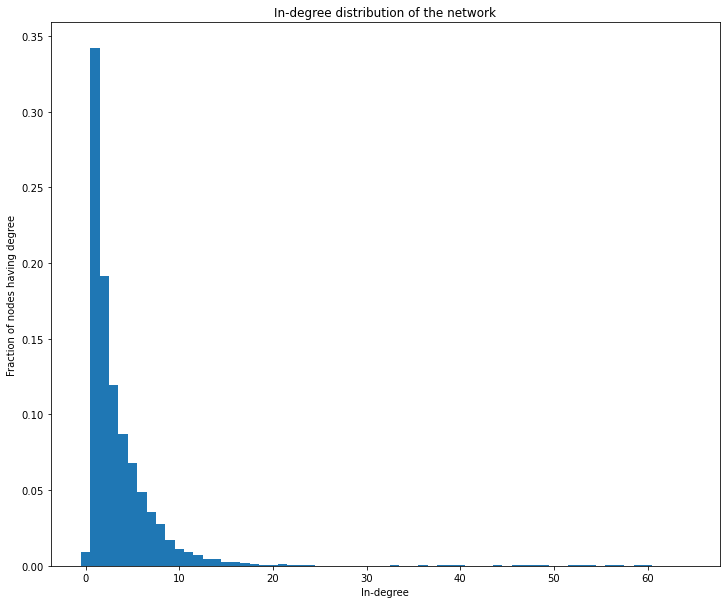

In [15]:
deg = pd.Series(indegrees)
values = deg.value_counts()
d = {}
for idx, i in zip(values.index, values):
    d[idx] = i
d = dict(sorted(d.items()))
y = [i/nodes for i in list(d.values())]
plt.figure(figsize = (12,10))
plt.bar(d.keys(), y, width = 1)
plt.xlabel('In-degree')
plt.ylabel('Fraction of nodes having degree')
plt.title('In-degree distribution of the network')
#plt.xscale('log')
plt.show()

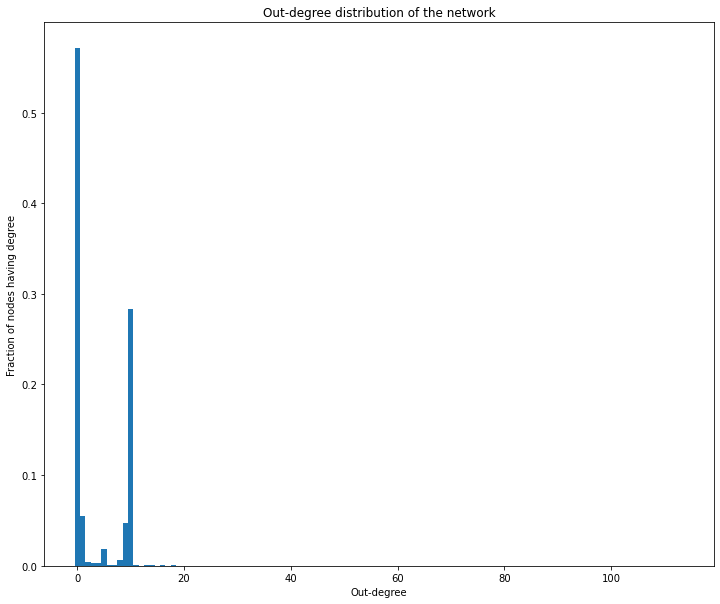

In [16]:
deg = pd.Series(outdegrees)
values = deg.value_counts()
d = {}
for idx, i in zip(values.index, values):
    d[idx] = i
d = dict(sorted(d.items()))
y = [i/nodes for i in list(d.values())]
plt.figure(figsize = (12,10))
plt.bar(d.keys(), y, width = 1)
plt.xlabel('Out-degree')
plt.ylabel('Fraction of nodes having degree')
plt.title('Out-degree distribution of the network')
#plt.xscale('log')
plt.show()

## 2. Calculate the local clustering coefficient of each node and plot the clustering-coefficient distribution of the network.

In [21]:
LCCs = []
for i in range(nodes):
    neighbours = [j for j in range(nodes) if adj_matrix[i][j] == 1 or adj_matrix[j][i] == 1]
    neighbours = list(combinations(neighbours,2))
    cnt = 0
    for n in neighbours:
        if adj_matrix[n[0]][n[1]] == 1:
            cnt += 1
        elif adj_matrix[n[1]][n[0]] == 1:
            cnt += 1
    if len(neighbours) <= 0:
        LCCs.append(0)
    else:
        LCCs.append(cnt/len(neighbours))      
np.mean(LCCs)

0.006676464552916517

#### Assumptions = Rounded to 2 decimal places
#### To-do: Print log scale graphs, bar graphs

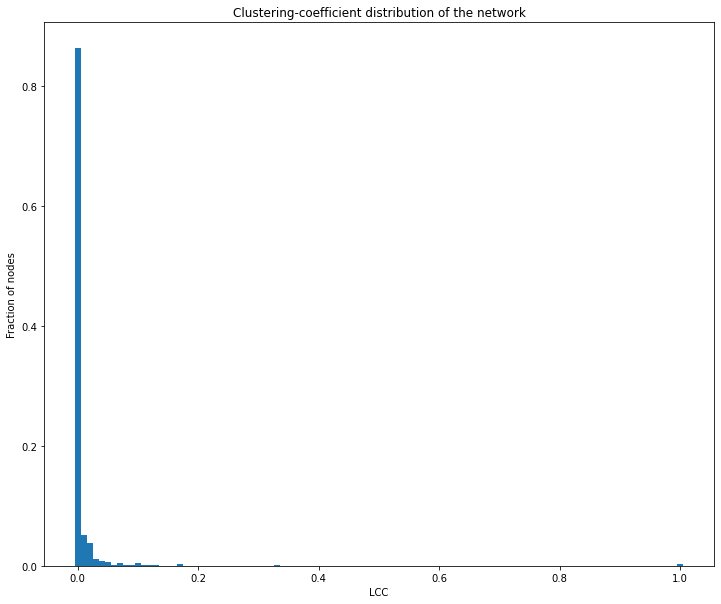

In [22]:
lcc_series = pd.Series(LCCs)
lcc_series = lcc_series.apply(lambda x: round(x,2))
values = lcc_series.value_counts()
d = {}
for idx, i in zip(values.index, values):
    d[idx] = i
d = dict(sorted(d.items()))
y = [i/nodes for i in list(d.values())]
plt.figure(figsize = (12,10))
plt.bar(d.keys(), y, width = 0.01)
plt.xlabel('LCC')
plt.ylabel('Fraction of nodes')
plt.title('Clustering-coefficient distribution of the network')
#plt.xscale('log')
plt.show()